In [2]:
import numpy as np
import matplotlib.pyplot as plt

from compression import calculateCompRatio, compress_dataset
from utils.personal_utils import *

import os
import pywt

import matplotlib.pyplot as plt
import time

In [11]:
all_datasets_dic = {
    'AppliancesEnergy':   '/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts',
    'NewsTitleSentiment': '/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts',
    'BenzeneConcentration':'/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts',
    'BeijingPM25Quality': '/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts',

    'IEEEPPG':            '/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts',
    'FloodModeling1':     '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts',
    'HouseholdPowerConsumption1': '/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts',
    'Covid3Month':              "/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts"

}

all_datasets = [
    '/home/sim/Desktop/TS Extrinsic Regression/data/AppliancesEnergy_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/NewsTitleSentiment_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/BenzeneConcentration_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/BeijingPM25Quality_TEST.ts',
    
    '/home/sim/Desktop/TS Extrinsic Regression/data/IEEEPPG_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/HouseholdPowerConsumption1_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts'
]


""" all_datasets = [
    '/home/sim/Desktop/TS Extrinsic Regression/data/FloodModeling1_TEST.ts',
    '/home/sim/Desktop/TS Extrinsic Regression/data/Covid3Month_TEST.ts'
] """






dataset_params = {
    'AppliancesEnergy':          {'block_size': 1008, 'num_dim': 24, 'len_ts': 144},
    'BeijingPM25Quality':        {'block_size': 1008, 'num_dim': 9, 'len_ts': 24},
    'IEEEPPG':                   {'block_size': 1000, 'num_dim': 5, 'len_ts': 1000},
    'FloodModeling1':           {'block_size': 1064, 'num_dim': 1, 'len_ts': 266},



    'Covid3Month':               {'block_size': 1008, 'num_dim': 1, 'len_ts': 84}, 
    'BenzeneConcentration':      {'block_size': 960, 'num_dim': 8, 'len_ts': 240},
    'NewsTitleSentiment':        {'block_size': 1008, 'num_dim': 3, 'len_ts': 144},
    'HouseholdPowerConsumption1':{'block_size': 1440, 'num_dim': 5, 'len_ts': 1440},
    
}



Time taken for dataset AppliancesEnergy: 10.67 seconds
Time taken for dataset NewsTitleSentiment: 787.57 seconds
Time taken for dataset BenzeneConcentration: 768.27 seconds
Time taken for dataset BeijingPM25Quality: 110.59 seconds
Time taken for dataset IEEEPPG: 455.06 seconds
Time taken for dataset FloodModeling1: 3.83 seconds
Time taken for dataset HouseholdPowerConsumption1: 337.06 seconds
Time taken for dataset Covid3Month: 0.38 seconds


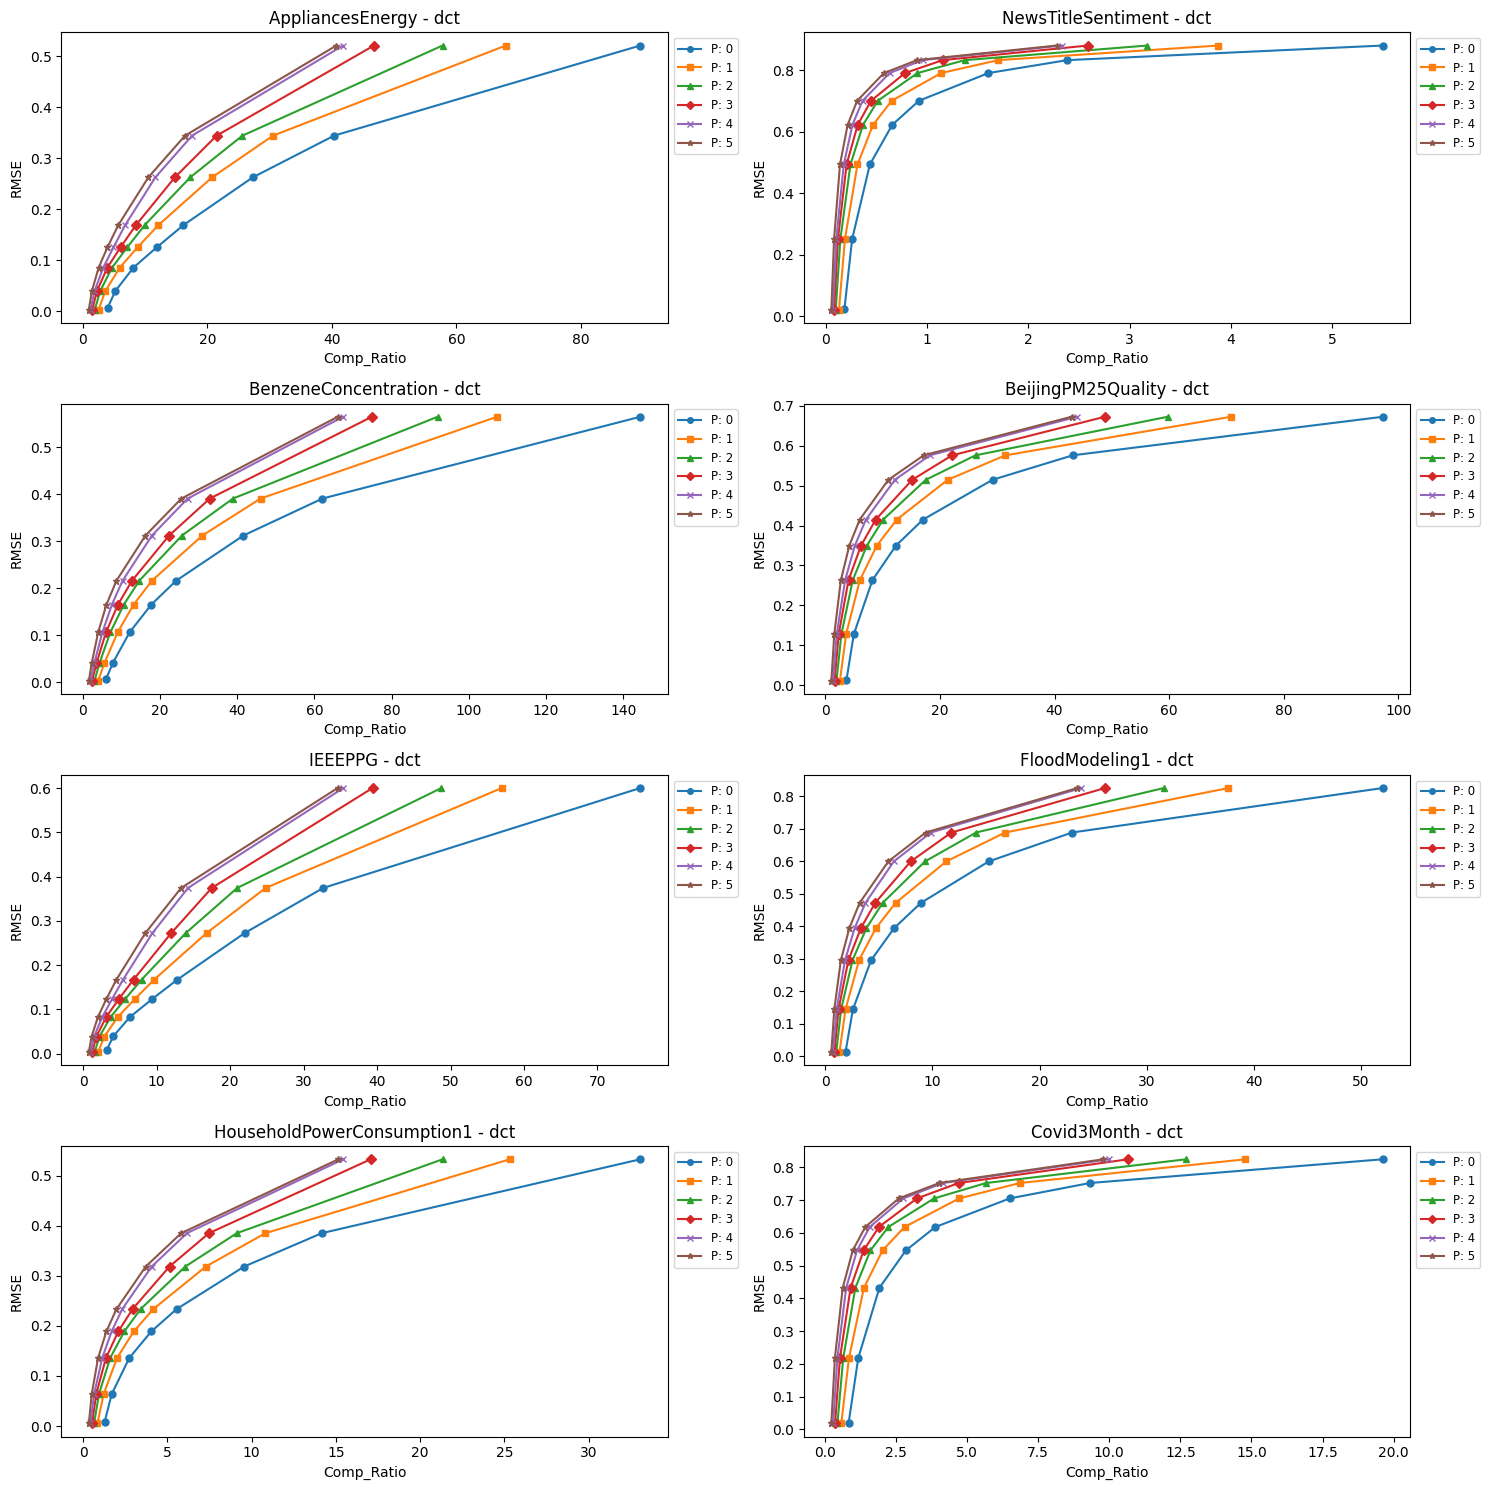

In [14]:
# Takes 10times as long as for wavelet study! Around 30min for each technique.

comp_type = "dct"

markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']

dropout_values = [0.1, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]

plt.figure(figsize=(15, 15))  # Adjust the width and height as needed
for subplot_id, dataset_path in enumerate(all_datasets):
    plt.subplot(4,2, subplot_id + 1)
    start_time = time.time()
    dataset_id = os.path.basename(dataset_path).split('_')[0]
    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + dataset_id + '_TEST.npy')



    for precision in range(6):

        comp_ratios = np.empty_like(dropout_values)
        rmses = np.empty_like(dropout_values)


        for i, step in enumerate(dropout_values):

            array_flatdim = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= False, compression_type= comp_type, compression_param=step, quantization_level=precision)
            comp_ratios[i] = calculateCompRatio(dataset_array, array_flatdim)

            # Get RMSE
            decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= True, compression_type= comp_type, compression_param=step, quantization_level= precision)
            rmses[i]= compute_avg_rmse_of_dataset(dataset_array, decomp_dataset_array)

            #rmses[i] = np.random.rand()
            #comp_ratios[i] = np.random.rand()


        marker_style = markers[precision]
        plt.plot(comp_ratios, rmses, markersize=5, marker=marker_style, label=f"P: {precision}")

    plt.xlabel("Comp_Ratio")
    plt.ylabel("RMSE")
    plt.title(f"{dataset_id} - {comp_type}")
    plt.legend(fontsize="small", loc='upper left', bbox_to_anchor=(1, 1), markerscale=0.8)
    
    end_time = time.time()
    print(f"Time taken for dataset {dataset_id}: {end_time - start_time:.2f} seconds")


plt.tight_layout()


plt.show()

Time taken for dataset AppliancesEnergy: 3.36 seconds
Time taken for dataset NewsTitleSentiment: 217.80 seconds
Time taken for dataset BenzeneConcentration: 238.38 seconds
Time taken for dataset BeijingPM25Quality: 31.59 seconds
Time taken for dataset IEEEPPG: 149.30 seconds
Time taken for dataset FloodModeling1: 1.18 seconds
Time taken for dataset HouseholdPowerConsumption1: 106.11 seconds
Time taken for dataset Covid3Month: 0.11 seconds


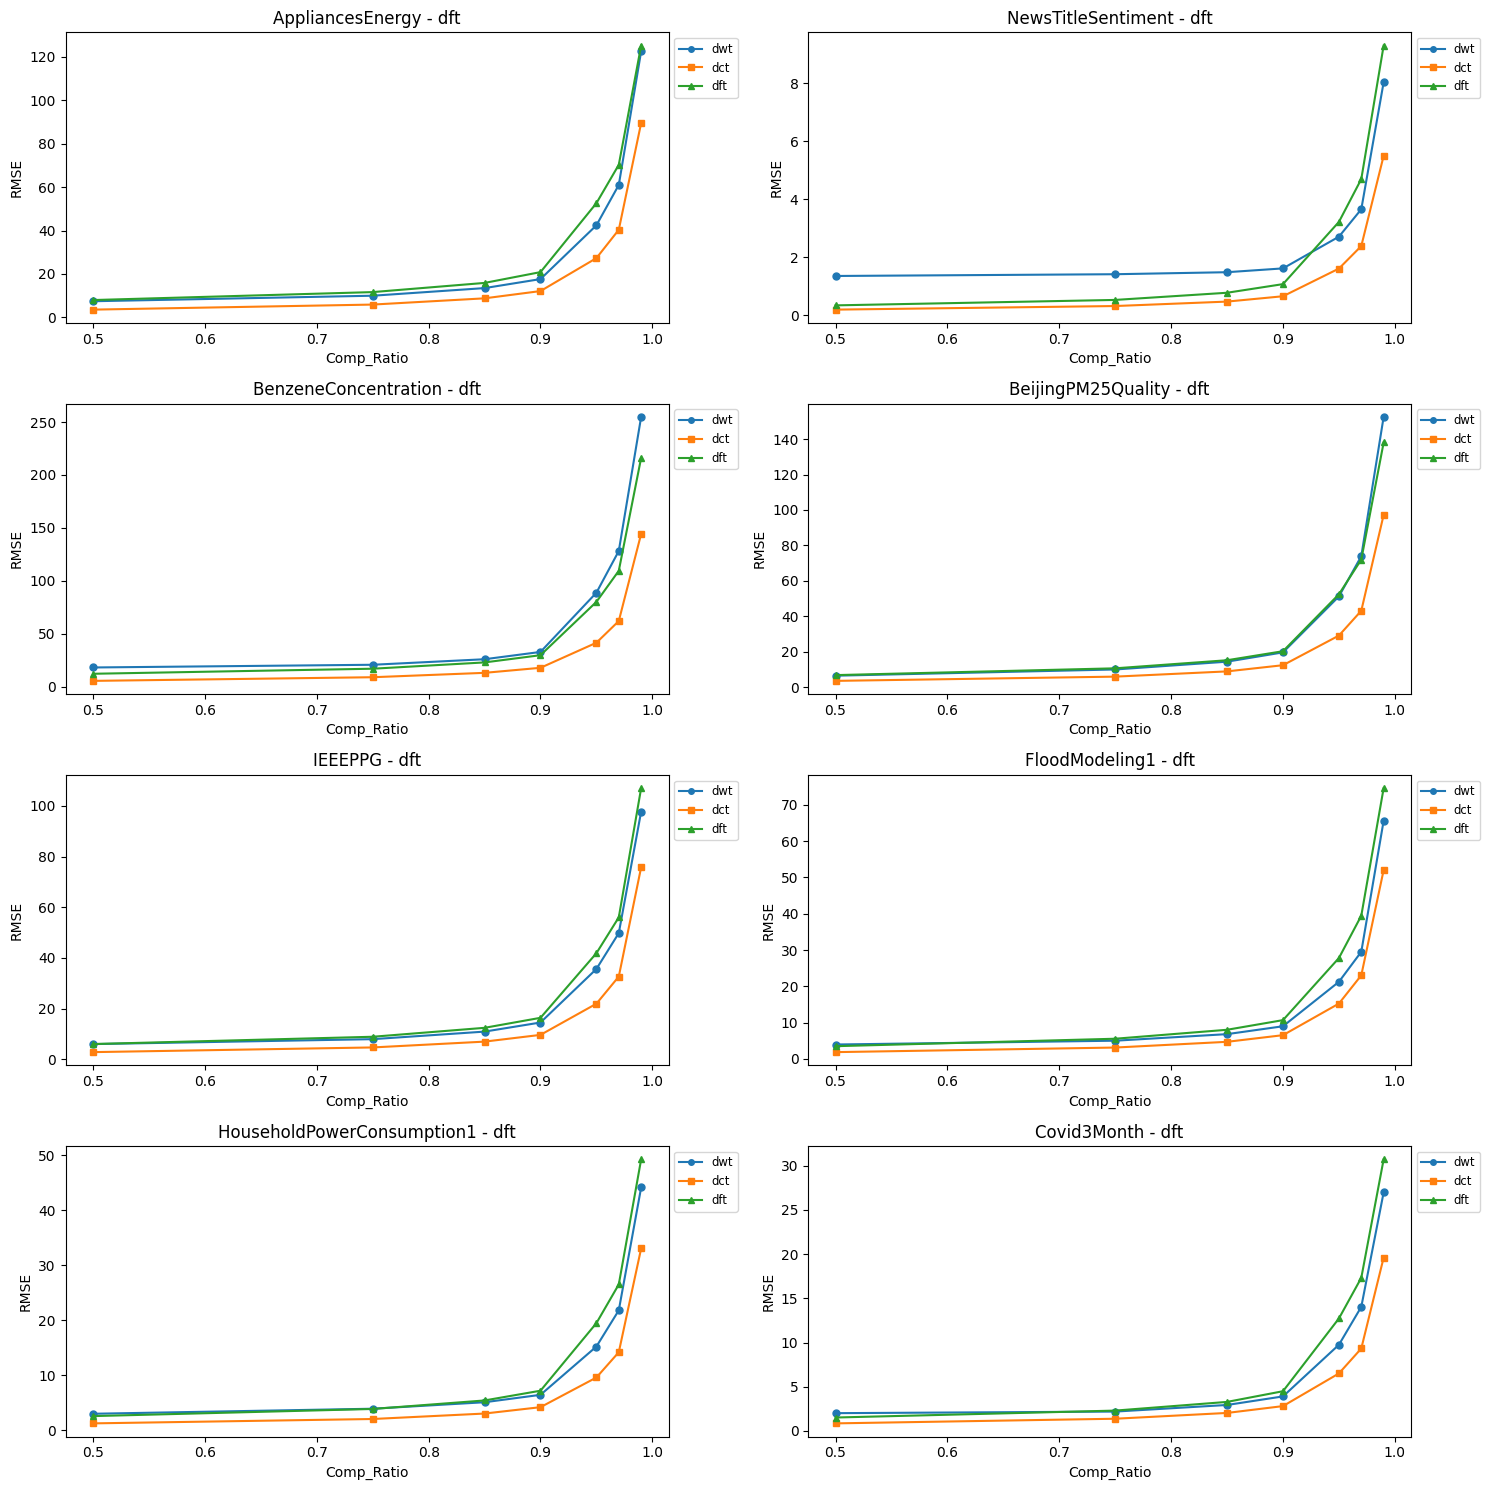

In [16]:
# Calculate Dropout_Value vs Comp_Ratio
#->> change to have dropout values as markers


markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']
dropout_values = [0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]
compression_types =["dwt", "dct", "dft"]



plt.figure(figsize=(15, 15))  # Adjust the width and height as needed
for subplot_id, dataset_path in enumerate(all_datasets):
    plt.subplot(4,2, subplot_id + 1)
    start_time = time.time()
    dataset_id = os.path.basename(dataset_path).split('_')[0]
    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + dataset_id + '_TEST.npy')


    m_idx = 0
    for compression_type in compression_types:
    

        comp_ratios = np.empty_like(dropout_values)

        for i,step in enumerate(dropout_values):
            # Get CompRatio
            array_flatdim = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= False, compression_type=compression_type, compression_param=step)
            comp_ratios[i] = calculateCompRatio(dataset_array, array_flatdim)
            
            #comp_ratios[i] = np.random.rand()


        marker_style = markers[m_idx]
        m_idx = m_idx + 1
        plt.plot(dropout_values, comp_ratios, markersize=5, marker=marker_style, label=f"{compression_type}")

    plt.xlabel("Dropout-Value")
    plt.ylabel("Comp_Ratio")
    plt.title(f"{dataset_id} - {compression_type}")
    plt.legend(fontsize="small", loc='upper left', bbox_to_anchor=(1, 1), markerscale=0.8)
    
    end_time = time.time()
    print(f"Time taken for dataset {dataset_id}: {end_time - start_time:.2f} seconds")


plt.tight_layout()


plt.show()

Time taken for dataset AppliancesEnergy: 4.09 seconds
Time taken for dataset NewsTitleSentiment: 270.86 seconds
Time taken for dataset BenzeneConcentration: 290.00 seconds
Time taken for dataset BeijingPM25Quality: 43.24 seconds
Time taken for dataset IEEEPPG: 178.67 seconds
Time taken for dataset FloodModeling1: 1.47 seconds
Time taken for dataset HouseholdPowerConsumption1: 124.74 seconds
Time taken for dataset Covid3Month: 0.15 seconds


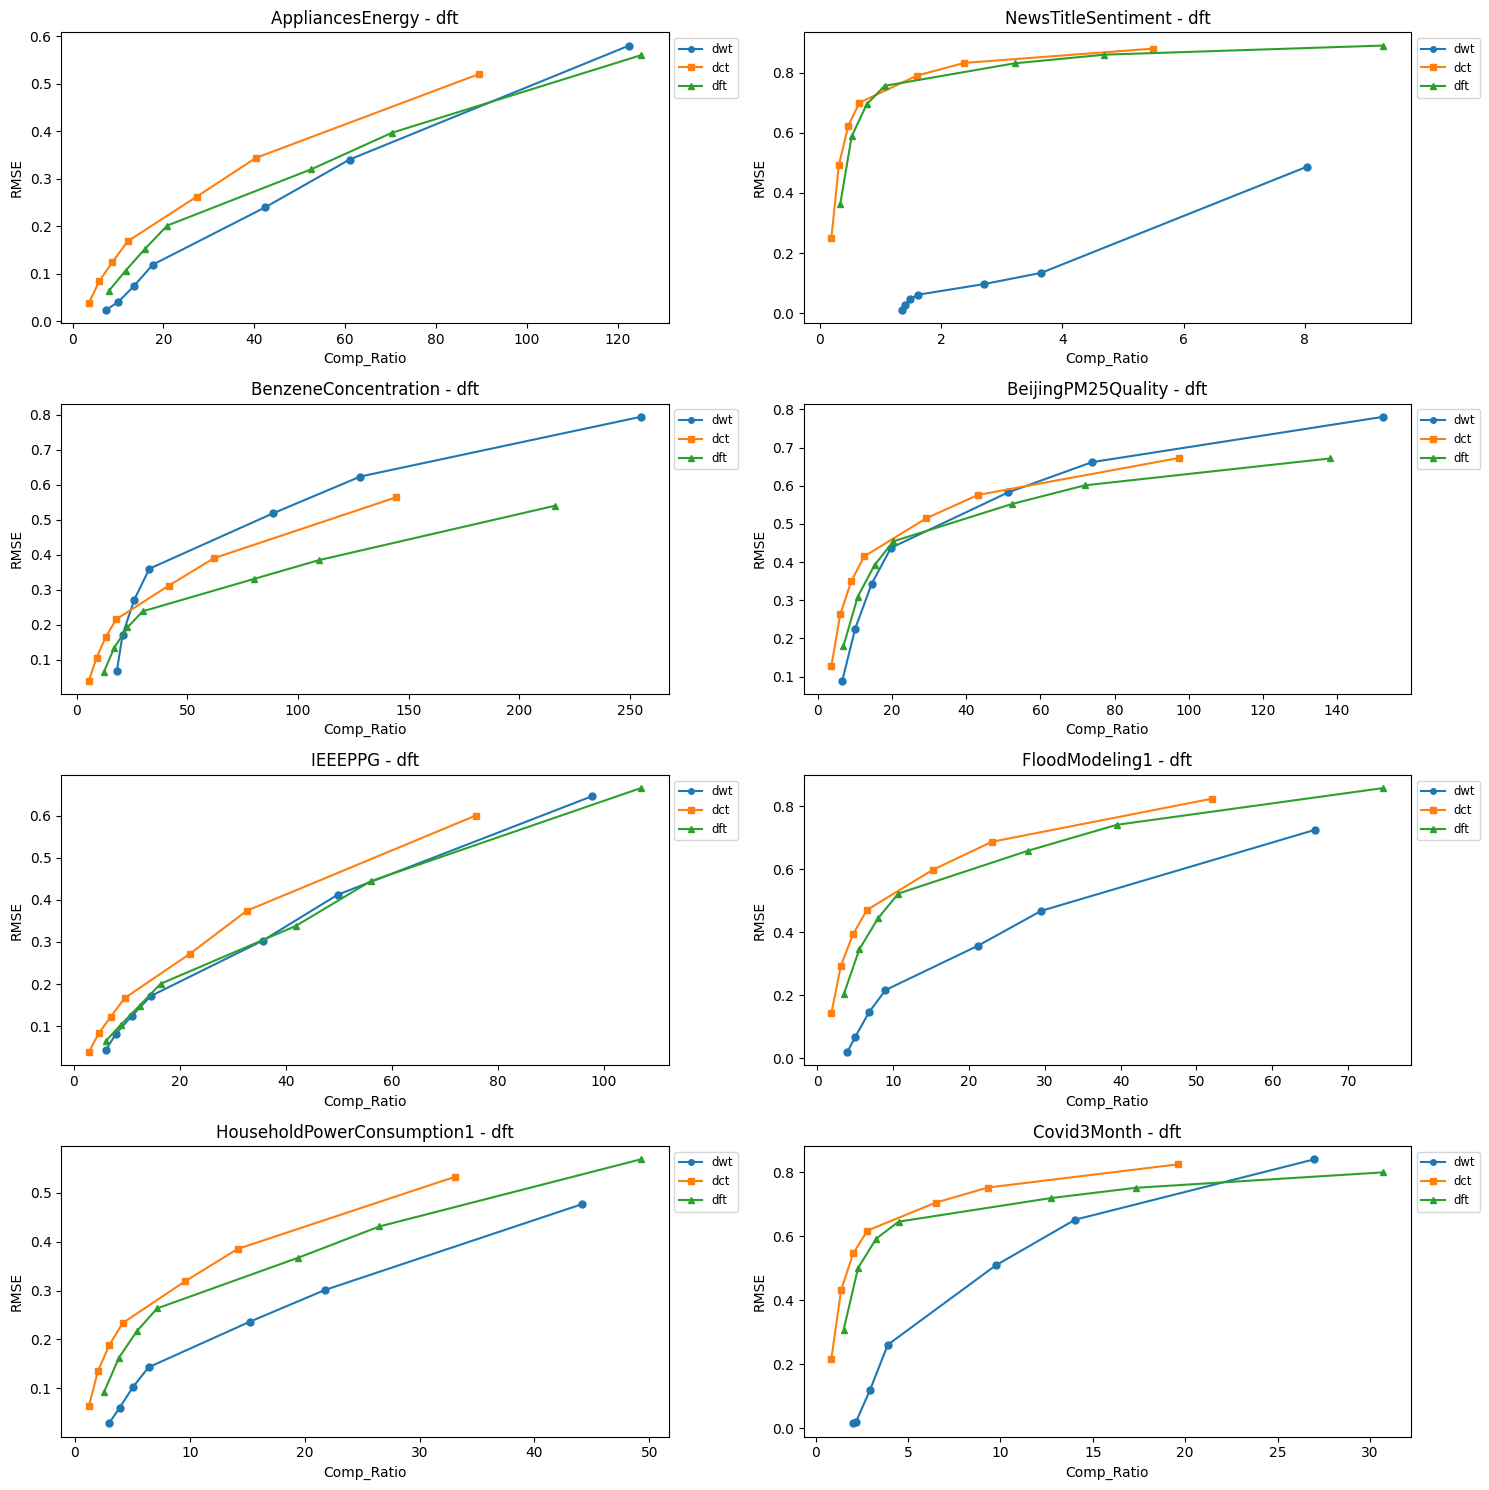

In [12]:
# Calculate Comp_ratio vs. RMSE

markers = ['o', 's', '^', 'D', 'x', '*', 'p', 'h', '+', 'v']
dropout_values = [0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99]
compression_types =["dwt", "dct", "dft"]



plt.figure(figsize=(15, 15))  # Adjust the width and height as needed
for subplot_id, dataset_path in enumerate(all_datasets):
    plt.subplot(4,2, subplot_id + 1)
    start_time = time.time()
    dataset_id = os.path.basename(dataset_path).split('_')[0]
    dataset_array = np.load('/home/sim/Desktop/TS Extrinsic Regression/data/Dataset-Arrays/' + dataset_id + '_TEST.npy')


    m_idx = 0
    for compression_type in compression_types:
    

        comp_ratios = np.empty_like(dropout_values)
        rmses = np.empty_like(dropout_values)

        for i,step in enumerate(dropout_values):
            # Get CompRatio
            array_flatdim = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= False, compression_type=compression_type, compression_param=step)
            comp_ratios[i] = calculateCompRatio(dataset_array, array_flatdim)
            # Get RMSE
            decomp_dataset_array = compress_dataset(dataset_array.copy(), dataset_id, andDecompress= True, compression_type=compression_type, compression_param=step)
            rmses[i]= compute_avg_rmse_of_dataset(dataset_array, decomp_dataset_array)

            #rmses[i] = np.random.rand()
            #comp_ratios[i] = np.random.rand()


        marker_style = markers[m_idx]
        m_idx = m_idx + 1
        plt.plot(comp_ratios, rmses, markersize=5, marker=marker_style, label=f"{compression_type}")

    plt.xlabel("Comp_Ratio")
    plt.ylabel("RMSE")
    plt.title(f"{dataset_id} - {compression_type}")
    plt.legend(fontsize="small", loc='upper left', bbox_to_anchor=(1, 1), markerscale=0.8)
    
    end_time = time.time()
    print(f"Time taken for dataset {dataset_id}: {end_time - start_time:.2f} seconds")


plt.tight_layout()


plt.show()